In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-12-01 15:12:38.575235: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 15:12:38.640720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 15:12:38.640785: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 15:12:38.642438: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 15:12:38.652014: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 15:12:38.652649: I tensorflow/core/platform/cpu_feature_guard.cc:1

Q1. Theory and Concepts:

1. Explain the concept of batch normalization in the context of Artificial Neural Networks.

Answer--> Batch normalization is a technique in DL which help in fater training and better results. This help in normalizing the output of a neur which is going to be the input for the next neurons   

2. Describe the benefits of using batch normalization during training.

Answer--> Here are some benifits of the batch normalization:

    a.Faster Conversance:
    b.Increse Sablabity in model 
    c.Solve problem of Inter Covariate Shift 
    d.Remove negetive impact of weights initialization 
    
3. Discuss the working principle of batch normalization, including the normalization step and the learnable parameters.

Answer-->Here's how Batch Normalization works:

    1 Set a Batch Size
    2 find mean and std fo that batch data
    3 Normalize the output of a neuron using the mean and std
    4 Then apply scaling and shifting 
    
        y= γ*x_norm+β
    note: each neuron contains its own γ and β which are the learning parameters fot the neuron
    
    4 Then pass this as input for the next neuron 

Q2. Impementation:

1. Choose a dataset of your choice (e.g., MNIST, CIAR-0) and preprocess it.
2. Implement a simple feedforward neural network using any deep learning framework/library (e.g.,Tensorflow, pyTorch).
3. Train the neural network on the chosen dataset without using batch normalization.
4. Implement batch normalization layers in the neural network and train the model again.
5. Compare the training and validation performance (e.g., accuracy, loss) between the models with and without batch normalization.
6. Discuss the impact of batch normalization on the training process and the performance of the neural network.

In [3]:
# importing the dataset

mnist = tf.keras.datasets.mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [4]:
print(f" data type of X_train_full: {x_train_full.dtype}, \n shape of X_train_full: {x_train_full.shape}, \n shape of x_test {x_test.shape}")

 data type of X_train_full: uint8, 
 shape of X_train_full: (60000, 28, 28), 
 shape of x_test (10000, 28, 28)


## Without batch normalization 

In [5]:
# spliting and scaling [0-1]
x_valid, x_train = x_train_full[:5000]/255, x_train_full[5000:]/255

y_valid, y_train = y_train_full[:5000]/255, y_train_full[5000:]/255  

x_test = x_test/255

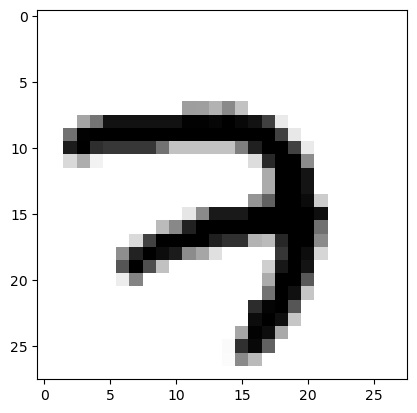

In [6]:
# VISUALIZATION
plt.imshow(x_train[0], cmap = "binary");

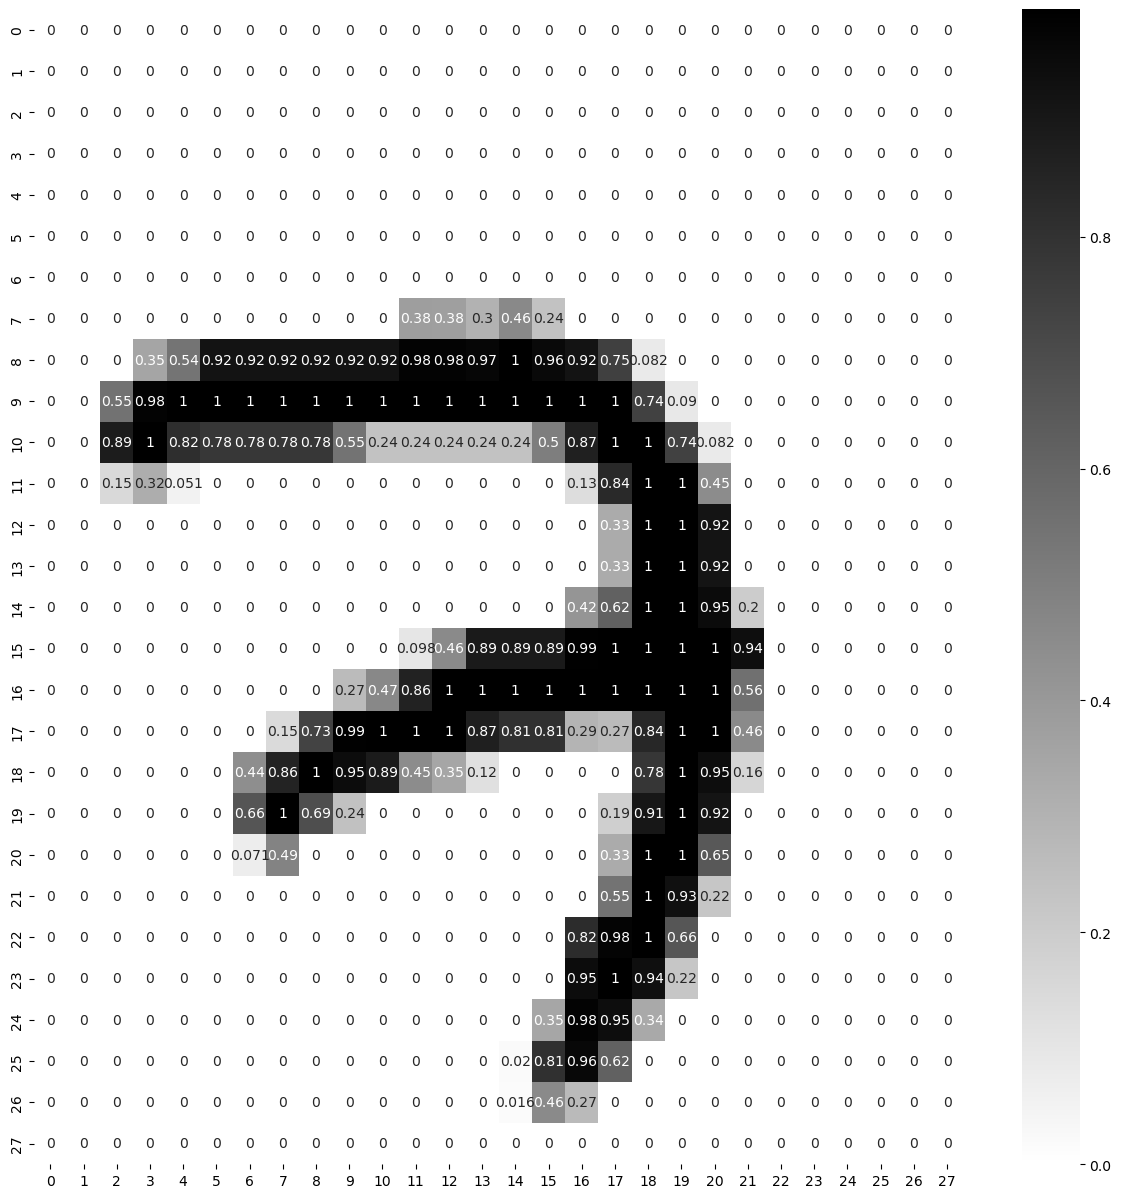

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], annot=True, cmap = "binary");

In [8]:
# creating layout

LAYERS1 = [tf.keras.layers.Flatten(input_shape= [28,28], name="inputLayer"),
         tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
         tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
         tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")] 

In [9]:
# MODEL defining

model_no_bn = tf.keras.models.Sequential(LAYERS1)

In [10]:
# model compilation
LOSS = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]
model_no_bn.compile(loss=LOSS,
             optimizer=OPTIMIZER,
             metrics=METRICS)

In [11]:
model_no_bn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
layer1 = model_no_bn.layers[1]

In [13]:
weights, biases = layer1.get_weights()

In [14]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[ 0.02580892, -0.05053703,  0.02442029, ...,  0.05517605,
        -0.05961733, -0.04149939],
       [ 0.01584945,  0.07281131, -0.04517049, ..., -0.05299106,
         0.01301199, -0.00583377],
       [-0.06858059, -0.00442599, -0.05459194, ...,  0.03460386,
        -0.00077965, -0.05220222],
       ...,
       [ 0.03502272, -0.02488142, -0.00986029, ..., -0.02447556,
        -0.05059785, -0.01675915],
       [ 0.06175047, -0.02731198,  0.00984245, ...,  0.02278392,
         0.04910482, -0.01686982],
       [-0.07359189, -0.00993719, -0.02066705, ...,  0.01152134,
         0.01931129,  0.00835065]], dtype=float32)

In [15]:
print("shape\n",biases.shape, "\n")
biases

shape
 (300,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
# model training without batch normalization

EPOCHS = 5
VALIDATION_SET = [x_valid, y_valid]
 
history1 = model_no_bn.fit(x_train, y_train,
                      epochs=EPOCHS,
                      validation_data = VALIDATION_SET
                     )

Epoch 1/5
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0025 - accuracy: 0.0990 - val_loss: 2.8531e-07 - val_accuracy: 0.0958
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 1.5375e-07 - accuracy: 0.0990 - val_loss: 2.9015e-08 - val_accuracy: 0.0958
Epoch 3/5
1719/1719 [==============================] - 7s 4ms/step - loss: 2.7110e-08 - accuracy: 0.0990 - val_loss: 6.9380e-09 - val_accuracy: 0.0958
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 9.0424e-09 - accuracy: 0.0990 - val_loss: 2.7180e-09 - val_accuracy: 0.0958
Epoch 5/5
1719/1719 [==============================] - 7s 4ms/step - loss: 3.8884e-09 - accuracy: 0.0990 - val_loss: 1.0729e-09 - val_accuracy: 0.0958


##  With Batch Normalization

In [19]:
LAYERS2 = [tf.keras.layers.Flatten(input_shape = [28,28], name = "inputLayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation = "softmax", name = "outputLayer")
          ]

In [20]:
model_bn = tf.keras.models.Sequential(LAYERS2)

In [21]:
model_bn.compile(loss=LOSS,
                optimizer=OPTIMIZER,
                 metrics=METRICS
                )

In [40]:
history2 = model_bn.fit(x_train, y_train,
             epochs= EPOCHS,
            validation_data=VALIDATION_SET,
            batch_size=30
            )

Epoch 1/5
1834/1834 [==============================] - 10s 5ms/step - loss: 1.0053e-08 - accuracy: 0.0990 - val_loss: 2.4080e-09 - val_accuracy: 0.0958
Epoch 2/5
1834/1834 [==============================] - 10s 5ms/step - loss: 4.1181e-10 - accuracy: 0.0990 - val_loss: 2.6226e-10 - val_accuracy: 0.0958
Epoch 3/5
1834/1834 [==============================] - 10s 5ms/step - loss: 4.3349e-12 - accuracy: 0.0990 - val_loss: 2.3842e-11 - val_accuracy: 0.0958
Epoch 4/5
1834/1834 [==============================] - 10s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 5/5
1834/1834 [==============================] - 10s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958


In [41]:
## compare th model performance for both model
evaluation_no_bn = model_no_bn.evaluate(x_test, y_test)
evaluation_bn = model_bn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 21.1863 - accuracy: 0.0980


In [42]:
# Print and analyze the performance differences

print(f"Evaluation without Batch Normalization: {evaluation_no_bn[1] * 1000:.2f}%")
print(f"Evaluation with Batch Normalization: {evaluation_bn[1] * 1000:.2f}%")

Evaluation without Batch Normalization: 98.00%
Evaluation with Batch Normalization: 98.00%


Q3. ExperimentatiTn and Analysis:

1. Experiment with different batch sizes and observe the effect on the training dynamics and model performance.
2. Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks.

In [44]:
history3 = model_bn.fit(x_train, y_train,
            epochs= EPOCHS,
            validation_data=VALIDATION_SET,
            batch_size=32
            )

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958


In [45]:
history4 = model_bn.fit(x_train, y_train,
             epochs= EPOCHS,
            validation_data=VALIDATION_SET,
            batch_size=64
            )

Epoch 1/5
860/860 [==============================] - 5s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 2/5
860/860 [==============================] - 6s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 3/5
860/860 [==============================] - 6s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 4/5
860/860 [==============================] - 6s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 5/5
860/860 [==============================] - 6s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958


In [46]:
history5 = model_bn.fit(x_train, y_train,
             epochs= EPOCHS,
            validation_data=VALIDATION_SET,
            batch_size=126
            )

Epoch 1/5
437/437 [==============================] - 4s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 2/5
437/437 [==============================] - 4s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 3/5
437/437 [==============================] - 4s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 4/5
437/437 [==============================] - 4s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958
Epoch 5/5
437/437 [==============================] - 4s 8ms/step - loss: 0.0000e+00 - accuracy: 0.0990 - val_loss: 0.0000e+00 - val_accuracy: 0.0958


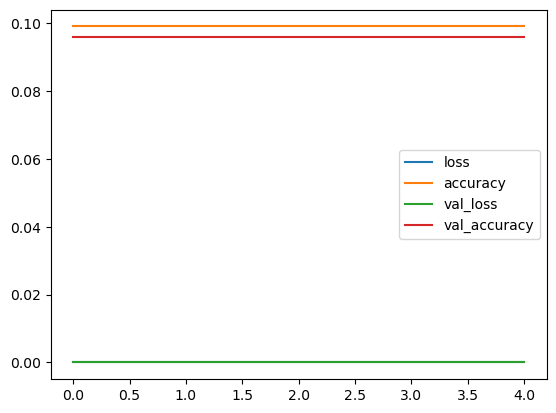

In [49]:
pd.DataFrame(history3.history).plot();

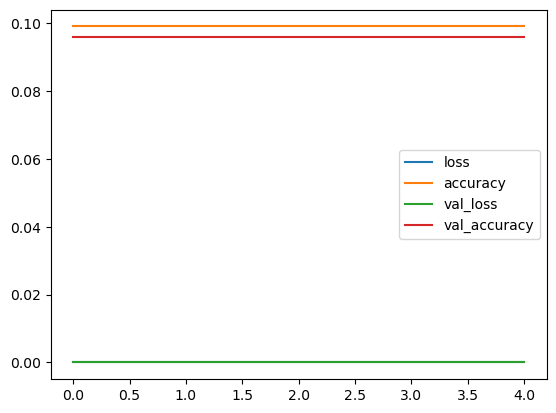

In [50]:
pd.DataFrame(history4.history).plot();

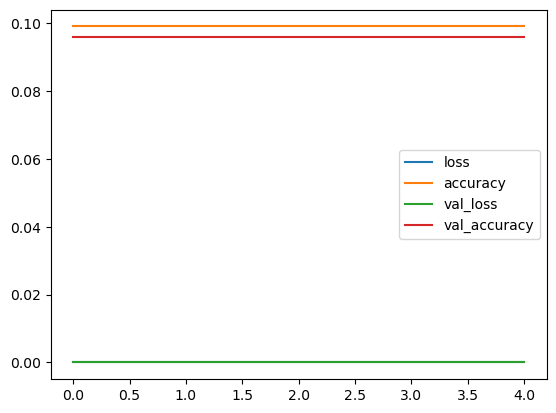

In [51]:
pd.DataFrame(history5.history).plot();

### Advantages of Batch Normalization:
1. Stabilizing Learning: Discuss how batch normalization helps in stabilizing and accelerating the training process by reducing internal covariate shift.
2. Regularization Effect: Explain how batch normalization acts as a form of regularization, reducing the reliance on dropout or other regularization techniques.
3. Gradient Flow: Highlight how batch normalization helps in maintaining a healthy gradient flow during training, preventing issues like vanishing or exploding gradients.
4. Applicability Across Networks: Discuss how batch normalization is applicable across various network architectures and layer types.
### Limitations of Batch Normalization:
1. Mini-Batch Dependency: Explain how batch normalization depends on the mini-batch statistics, which might not generalize well for smaller batch sizes or during inference on individual samples.
2. Impact on Training Time: Discuss potential computational overhead due to the additional computations involved in normalization, which might affect training time with large networks or batch sizes.
